In [1]:
import hubmapbags
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
import seaborn as sns

In [2]:
token = 'AgMW9qad7pdXD4YYw9nQnDkMV1G21wlDeOJnr1z5QnQDg5j92JUOCxJ0jlGMD5OXpy2MNON9PV7jV3faaWQw4C8wGq'
hubmapbags.utilities.clean()
hubmapbags.reports.daily(token=token)

,uuid,hubmap_id,status,group_name,data_type,dataset_type,created_datetime,published_datetime,is_protected
0,47015df8ab7615a9ce26098d88196dde,HBM439.BQLR.867,Published,University of California San Diego TMC,['salmon_sn_rnaseq_10x'],Derived,2023-03-24 20:19:26.090,2023-06-26 15:17:24.352,False
1,37988db44acc8d0780e4e31cd057e789,HBM425.GDJT.648,Published,University of California San Diego TMC,['salmon_sn_rnaseq_10x'],Derived,2023-03-24 18:25:18.080,2023-06-26 15:17:22.747,False
2,63349325056ccff582f1d095055c7e12,HBM842.DDTX.473,Published,University of California San Diego TMC,['salmon_sn_rnaseq_10x'],Derived,2023-03-24 17:47:05.423,2023-06-26 15:17:20.878,False
3,d482512016a61ef479960e2cb58552f2,HBM482.MCCP.264,Published,University of California San Diego TMC,['salmon_sn_rnaseq_10x'],Derived,2023-03-24 17:40:02.380,2023-06-26 15:17:19.279,False
4,524dc341a03c155b6f4140e9d72f9b1d,HBM938.WTSR.492,Published,University of California San Diego TMC,['salmon_sn_rnaseq_10x'],Derived,2023-03-24 14:45:46.120,2023-06-26 15:17:17.346,False
...,...,...,...,...,...,...,...,...,...
4373,faeb9078e6fe676737a462fdd81da779,HBM992.GWBL.348,Error,Stanford TMC,['sn_atac_seq_multiome_10x'],Derived,2023-03-01 12:06:17.570,NaN,False
4374,68a208f83e8af78e4d9bf88ed504d276,HBM286.JKTG.797,Error,Stanford TMC,['sn_atac_seq_multiome_10x'],Derived,2023-03-30 15:01:09.501,NaN,False
4375,f7a08d51de1ed92045160d995ab5325a,HBM894.JMRG.527,Error,Stanford TMC,['sn_atac_seq_multiome_10x'],Derived,2023-03-30 15:00:37.396,NaN,False
4376,c3f2cbee31049e1981e2e1d3e23f65fd,HBM835.RQWH.836,Error,Stanford TMC,['sn_atac_seq_multiome_10x'],Derived,2023-03-30 14:59:47.339,NaN,False


In [3]:
#get daily report
report_output_directory = "daily-report"
if not Path(report_output_directory).exists():
    Path(report_output_directory).mkdir()

now = datetime.now()
report_output_filename = f'{report_output_directory}/{str(now.strftime("%Y%m%d"))}.tsv'
print(report_output_filename)

df = pd.read_csv(report_output_filename, sep="\t")

daily-report/20230628.tsv


In [4]:
#dataframe keys
df.keys()

Index(['uuid', 'hubmap_id', 'status', 'group_name', 'data_type',
       'dataset_type', 'created_datetime', 'published_datetime',
       'is_protected'],
      dtype='object')

# Plots by Group Name

In [5]:
df['group_name'].unique()

array(['University of California San Diego TMC', 'Stanford TMC',
       'California Institute of Technology TMC',
       'University of Florida TMC',
       'TTD - Pacific Northwest National Laboratory', 'Stanford RTI',
       'Broad Institute RTI', 'TMC - University of Connecticut',
       'Northwestern RTI', 'General Electric RTI',
       'EXT - Human Cell Atlas', 'Vanderbilt TMC',
       "TMC - Children's Hospital of Philadelphia", 'IEC Testing Group',
       'TTD - Penn State University and Columbia University',
       'TMC - Pacific Northwest National Laboratory', 'Purdue TTD', nan,
       'TMC - University of Connecticut and Scripps',
       'TMC - University of Pennsylvania'], dtype=object)

In [6]:
group = df.groupby(['group_name', 'status']).count()[['data_type']]
print(group.to_markdown())

|                                                                       |   data_type |
|:----------------------------------------------------------------------|------------:|
| ('Broad Institute RTI', 'Published')                                  |         112 |
| ('Broad Institute RTI', 'QA')                                         |          43 |
| ('California Institute of Technology TMC', 'Error')                   |          16 |
| ('California Institute of Technology TMC', 'Invalid')                 |           8 |
| ('California Institute of Technology TMC', 'Published')               |         108 |
| ('California Institute of Technology TMC', 'QA')                      |          22 |
| ('EXT - Human Cell Atlas', 'Published')                               |           8 |
| ('EXT - Human Cell Atlas', 'QA')                                      |           2 |
| ('General Electric RTI', 'Error')                                     |          32 |
| ('General Electric RTI', 'Inva

<Figure size 3000x3500 with 0 Axes>

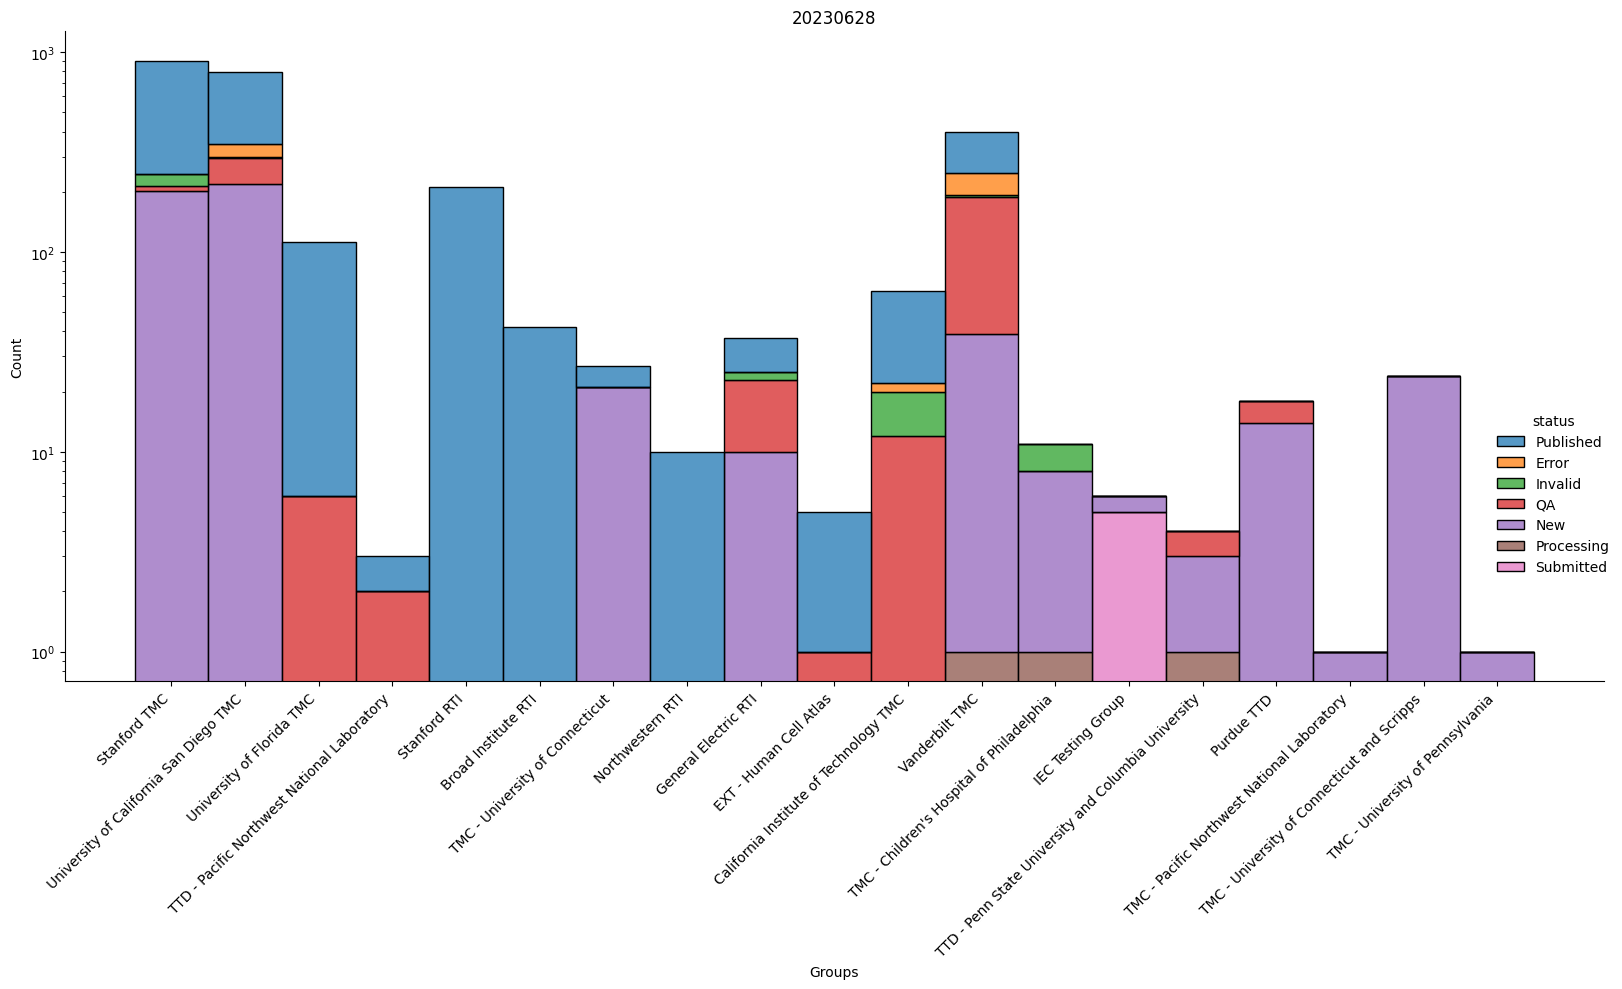

In [7]:
fig = plt.gcf()
fig.set_size_inches(30, 35)

# g = sns.displot(df[df['dataset_type']=='Primary'], height=10, x="group_name", hue="status", multiple='stack',aspect = 1.5)
# sns.move_legend(g, "upper right", ncol=1, title='Groups', frameon=False)

g = sns.displot(df[df['dataset_type']=='Primary'], height=10, x="group_name", hue="status", multiple='stack', aspect=1.5, log_scale=(False, True)) # Apply log scale on y-axis
# plt.xticks(df['group_name'],df['group_name'],rotation='vertical')
# plt.xticks(rotation='vertical')
plt.xticks(rotation=45, fontsize=10, ha='right')

g.set(xlabel='Groups',
       ylabel='Count',
       title=str(now.strftime("%Y%m%d")))

plt.savefig(report_output_filename.replace('tsv','png')) 
plt.tight_layout()
plt.savefig('plot.png') #first saved it
plt.show() #calling it

# Plots by Data Type

In [8]:
df['data_type'].unique()

array(["['salmon_sn_rnaseq_10x']", "['salmon_rnaseq_snareseq']",
       "['codex_cytokit']", "['CODEX']", "['LC-MS']",
       "['snRNAseq-10xGenomics-v3']", "['salmon_rnaseq_sciseq']",
       "['snATACseq']", "['sn_atac_seq_multiome_10x']",
       "['scRNAseq-10xGenomics-v3']", "['image_pyramid']",
       "['MALDI-IMS']", "['LC-MS_bottom_up']", "['MIBI']",
       "['salmon_rnaseq_slideseq']", "['Slide-seq']",
       "['salmon_rnaseq_10x']", "['LC-MS_top_down']",
       "['codex_cytokit_v1']", "['cell-dive']", "['snRNAseq']",
       "['scRNAseq-10xGenomics-v2']", "['sciRNAseq']", "['SNAREseq']",
       "['SNARE-RNAseq2']", "['WGS']", "['sc_atac_seq_snare']", "['PAS']",
       "['AF']", "['sc_atac_seq_sci']", "['sciATACseq']", "['IMC3D']",
       "['Lightsheet']", "['bulk_atacseq']", "['scRNA-Seq-10x']",
       "['image_pyramid', 'PAS']", "['image_pyramid', 'MALDI-IMS-pos']",
       "['sc_atac_seq_snare_lab']", "['sc_rna_seq_snare_lab']",
       "['image_pyramid', 'MALDI-IMS-neg']", "['M

In [9]:
data_type = df.groupby(['data_type', 'status']).count()
data_type

uuid  hubmap_id  group_name  \
data_type                    status                                    
['AF']                       Error         56         56          56   
                             Invalid        4          4           4   
                             New            2          2           2   
                             Processing     1          1           1   
                             Published     33         33          33   
...                                       ...        ...         ...   
['sn_atac_seq_multiome_10x'] Error         42         42          42   
                             New            1          1           1   
                             Processing     5          5           5   
                             Published     30         30          30   
                             QA            35         35          35   

                                         dataset_type  created_datetime  \
data_type                    status                                       
['AF']                       Error                 56                56   
                             Invalid                4                 4   
                             New                    2                 2   
                             Processing             1                 1   
                             Published             33                33   
...                                               ...               ...   
['sn_atac_seq_multiome_10x'] Error                 42                42   
                             New                    1                 1   
                             Processing             5                 5   
                             Published             30                30   
                             QA                    35                35   

                                         published_datetime  is_protected  
data_type                    status                                        
['AF']                       Error                        0            56  
                             Invalid                      0             4  
                             New                          0             2  
                             Processing                   0             1  
                             Published                   33            33  
...                                                     ...           ...  
['sn_atac_seq_multiome_10x'] Error                        0            42  
                             New                          0             1  
                             Processing                   0             5  
                             Published                   30            30  
                             QA                           0            35  

[145 rows x 7 columns]

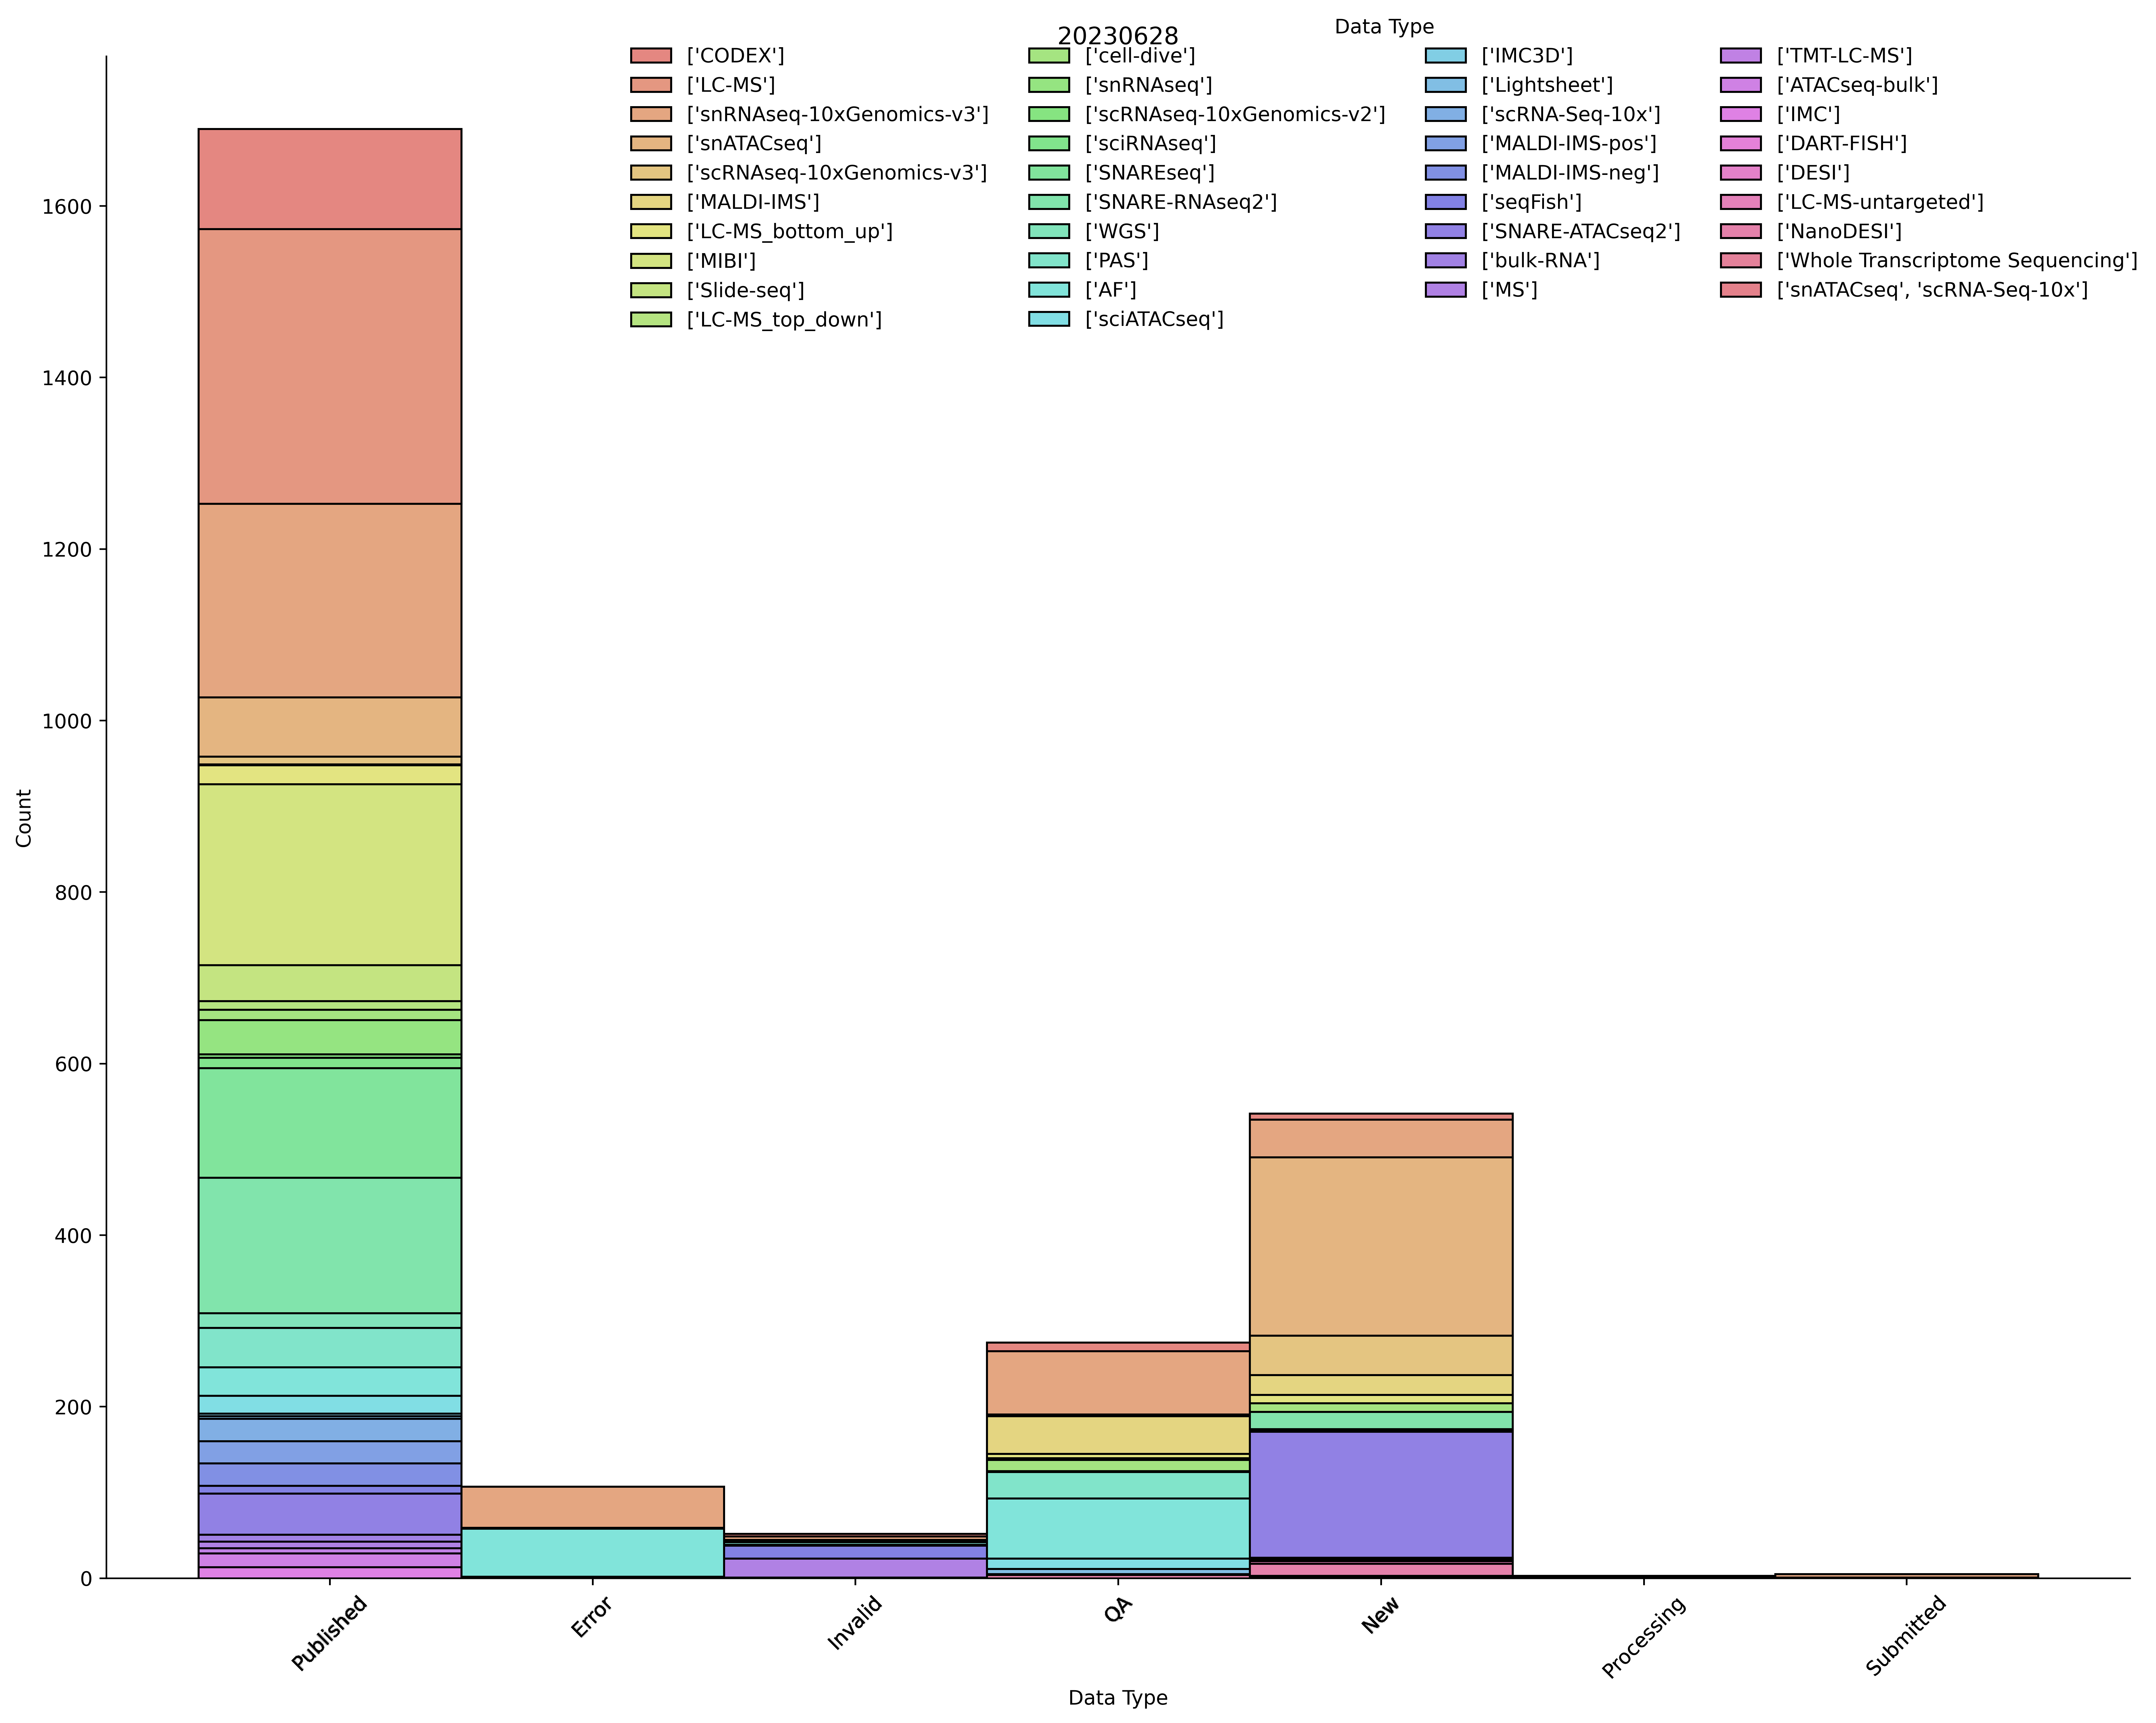

In [10]:
plt.rcParams['figure.figsize'] = [50.0, 50.0]
plt.rcParams['figure.dpi'] = 500

# g = sns.displot(df[df['dataset_type']=='Primary'], x="status", height=12, hue="data_type", multiple='stack', aspect = 1)
g = sns.displot(df[df['dataset_type']=='Primary'], x="status", height=12, hue="data_type", multiple='stack', aspect=1, palette="hls")

plt.xticks(df[df['dataset_type']=='Primary']['status'],df[df['dataset_type']=='Primary']['status'],rotation=45, fontsize=10)

g.set(xlabel='Data Type',
       ylabel='Count',
       title=str(now.strftime("%Y%m%d")))

sns.move_legend(g, "upper right", ncol=4, title='Data Type', frameon=False)

#plt.setp(g.get_legend().get_texts(), fontsize='12') # for legend text
#plt.setp(g.get_legend().get_title(), fontsize='32') 

plt.tight_layout()
plt.savefig('plot.png')
plt.show()

In [11]:
plt.rcParams['figure.figsize'] = [50.0, 50.0]
plt.rcParams['figure.dpi'] = 500

g = sns.displot(df[df['dataset_type']=='Primary'], height=10, x="data_type", hue="status", multiple='stack',aspect = 2)
plt.xticks(df[df['dataset_type']=='Primary']['data_type'],df[df['dataset_type']=='Primary']['data_type'],rotation=45, fontsize=10, ha='right')

#g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()

g.set(xlabel='Data Type',
       ylabel='Count',
       title=str(now.strftime("%Y%m%d")))

sns.move_legend(g, "center right", ncol=1, title='Dataset status', frameon=False)

plt.show()